## Классификация сервисов яндекс при помощи модели LigthGBM

In [1]:
import pandas as pd
import sys  
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, accuracy_score, ConfusionMatrixDisplay)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

print("Pandas version: ", pd.__version__)
print("lightgbm version: ", lgb.__version__)

Pandas version:  1.4.4
lightgbm version:  4.1.0


In [2]:
current_path = ''


df_final_filename = f'data/df_final_4serv.csv'

dfFinal = pd.read_csv(df_final_filename)

print('df_final: ', dfFinal.shape)

df_final:  (8375, 40)


In [3]:
dfFinal.dropna(axis=1,inplace=True)

In [4]:
dfFinal.columns.to_list()

['proto',
 'packets_count',
 'min_fiat',
 'min_biat',
 'flow_packets_per_second',
 'f_min_pkt_size',
 'b_min_pkt_size',
 'diag_step_fiat',
 'diag_step_biat',
 'diag_steps',
 'tcp_syn_count',
 'tcp_rst_count',
 'tcp_fin_count',
 'tcp_urg_count',
 'tcp_retr_count',
 'pktiat_0',
 'pktiat_1',
 'pktiat_2',
 'pktlen_1',
 'type']

In [5]:
y = dfFinal['type']
drop_col = ['type','proto','diag_step_fiat','diag_step_biat','diag_steps', 'pktiat_0', 'pktiat_1', 'pktiat_2']
X  = dfFinal.drop(columns=drop_col)

#### Разобьем данные на подопытные и проверочные

In [6]:
X_train, X_test, y_train, y_test = X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.3,
                                                        random_state=42,
                                                        stratify=None)

In [7]:
X_train.columns.to_list()

['packets_count',
 'min_fiat',
 'min_biat',
 'flow_packets_per_second',
 'f_min_pkt_size',
 'b_min_pkt_size',
 'tcp_syn_count',
 'tcp_rst_count',
 'tcp_fin_count',
 'tcp_urg_count',
 'tcp_retr_count',
 'pktlen_1']

## LightGBM

In [8]:
estimator = lgb.LGBMClassifier(objective='multiclass', 
                               boosting_type = 'gbdt', 
                               num_class = '3',
                               n_estimators = 1, 
                               num_trees = 1,
                               min_child_samples = 2,
                               class_weight = 'balanced')

##### ...со следующим набором гиперпараметров

In [9]:
parameters = {
    'max_depth': [3,4,5],
    'num_leaves': [10,20,30],
    'learning_rate': [0.1, 0.5, 1],
    'feature_fraction': [0.3, 0.5, 1],
}

In [10]:
grid_search = GridSearchCV(estimator, param_grid=parameters, scoring='accuracy', cv=3)

In [11]:
grid_search.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000161 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 885
[LightGBM] [Info] Number of data points in the train set: 3908, number of used features: 11
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000159 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 885
[LightGBM] [Info] Number of data points in the train set: 3908, number of used features: 11
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGB

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 890
[LightGBM] [Info] Number of data points in the train set: 3908, number of used features: 11
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000209 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 890
[LightGBM] [Info] Number of data points in the train set: 3908, number of used features: 11
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGB

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000617 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 890
[LightGBM] [Info] Number of data points in the train set: 3908, number of used features: 11
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignor

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000420 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 888
[LightGBM] [Info] Number of data points in the train set: 3908, number of used features: 11
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000271 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 885
[LightGBM] [Info] Number of data points in the train set: 3908, number of used features: 11
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000308 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 890
[LightGBM] [Info] Number of data points in the train set: 3908, number of used features: 11
[LightGBM] [Info] St

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000254 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 890
[LightGBM] [Info] Number of data points in the train set: 3908, number of used features: 11
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000331 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 888
[LightGBM] [Info] Number of data points in the train set: 3908, number of used features: 11
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003262 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 885
[LightGBM] [Info] Number of data points in the train set: 3908, number of used features: 11
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No fu

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000376 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 885
[LightGBM] [Info] Number of data points in the train set: 3908, number of used features: 11
[LightGBM] [Info] Start training

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000338 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 885
[LightGBM] [Info] Number of data points in the train set: 3908, number of used features: 11
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000341 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 888
[LightGBM] [Info] Number of data points in the train set: 3908, number of used features: 11
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Info] Total Bins 888
[LightGBM] [Info] Number of data points in the train set: 3908, number of used features: 11
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000352 seconds.
You can set `

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000308 seconds.
You can set `force_row_wise=true` to remove the overhead.
And i

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000618 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 890
[LightGBM] [Info] Number of data points in the train set: 3908, number of used features: 11
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


GridSearchCV(cv=3,
             estimator=LGBMClassifier(class_weight='balanced',
                                      min_child_samples=2, n_estimators=1,
                                      num_class='3', num_trees=1,
                                      objective='multiclass'),
             param_grid={'feature_fraction': [0.3, 0.5, 1],
                         'learning_rate': [0.1, 0.5, 1], 'max_depth': [3, 4, 5],
                         'num_leaves': [10, 20, 30]},
             scoring='accuracy')

In [12]:
grid_search.best_estimator_

LGBMClassifier(class_weight='balanced', feature_fraction=1, max_depth=5,
               min_child_samples=2, n_estimators=1, num_class='3',
               num_leaves=20, num_trees=1, objective='multiclass')

In [13]:
predictions_LGB = grid_search.predict(X_test)

[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1


In [14]:
print(grid_search.score(X_test, y_test))

[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
0.8280939116593713


Feature importances:


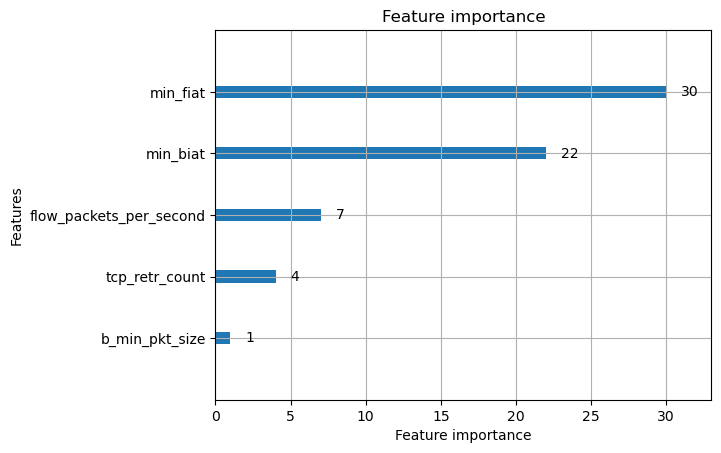


################################################################################
Confusion Matrix:


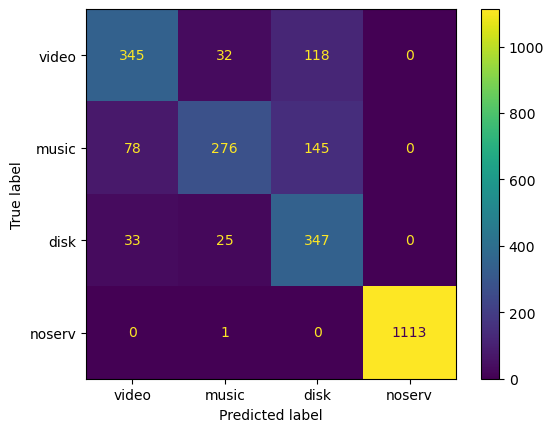


################################################################################
Classification Report:
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       495
           1       0.83      0.55      0.66       499
           2       0.57      0.86      0.68       405
           3       1.00      1.00      1.00      1114

    accuracy                           0.83      2513
   macro avg       0.79      0.78      0.77      2513
weighted avg       0.85      0.83      0.83      2513



In [15]:
feature_importances = np.zeros(X.shape[1])

print('Feature importances:')
lgb.plot_importance(grid_search.best_estimator_)
plt.show()

print('\n' + '#' * 80)
print('Confusion Matrix:')
    # functions.plot_confusion_matrix(valid_y, predictions_LGB.round(), "Analysis",
    #                                 index=["Std SSH", "Obf SSH"], columns=["Std SSH", "Obf SSH"])
    # metrics.confusion_matrix(model, valid_features, valid_y, cmap='Blues_r')
cm = confusion_matrix(y_test, predictions_LGB, labels=grid_search.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["video", "music", "disk",'noserv'])
disp.plot() #cmap='Blues_r')
plt.show()
    
print('\n' + '#' * 80)
print('Classification Report:')
print(metrics.classification_report(y_test, grid_search.predict(X_test)))
plt.show()
    


In [16]:
# Make sure to average feature importances! 
feature_importances = grid_search.best_estimator_.feature_importances_ / 2
feature_importances = pd.DataFrame({'feature': list(X.columns),
                                    'importance': feature_importances}
                                  ).sort_values('importance', ascending = False)

feature_importances.head(10)

,feature,importance
1,min_fiat,15.0
2,min_biat,11.0
3,flow_packets_per_second,3.5
10,tcp_retr_count,2.0
5,b_min_pkt_size,0.5
0,packets_count,0.0
4,f_min_pkt_size,0.0
6,tcp_syn_count,0.0
7,tcp_rst_count,0.0
8,tcp_fin_count,0.0


In [17]:
print(X_train.loc[1])
print(y_train.loc[1])

packets_count              10.000000
min_fiat                    0.000691
min_biat                    0.000010
flow_packets_per_second     1.000000
f_min_pkt_size             66.000000
b_min_pkt_size             66.000000
tcp_syn_count               0.000000
tcp_rst_count               0.000000
tcp_fin_count               0.000000
tcp_urg_count               0.000000
tcp_retr_count             10.000000
pktlen_1                   66.000000
Name: 1, dtype: float64
1


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

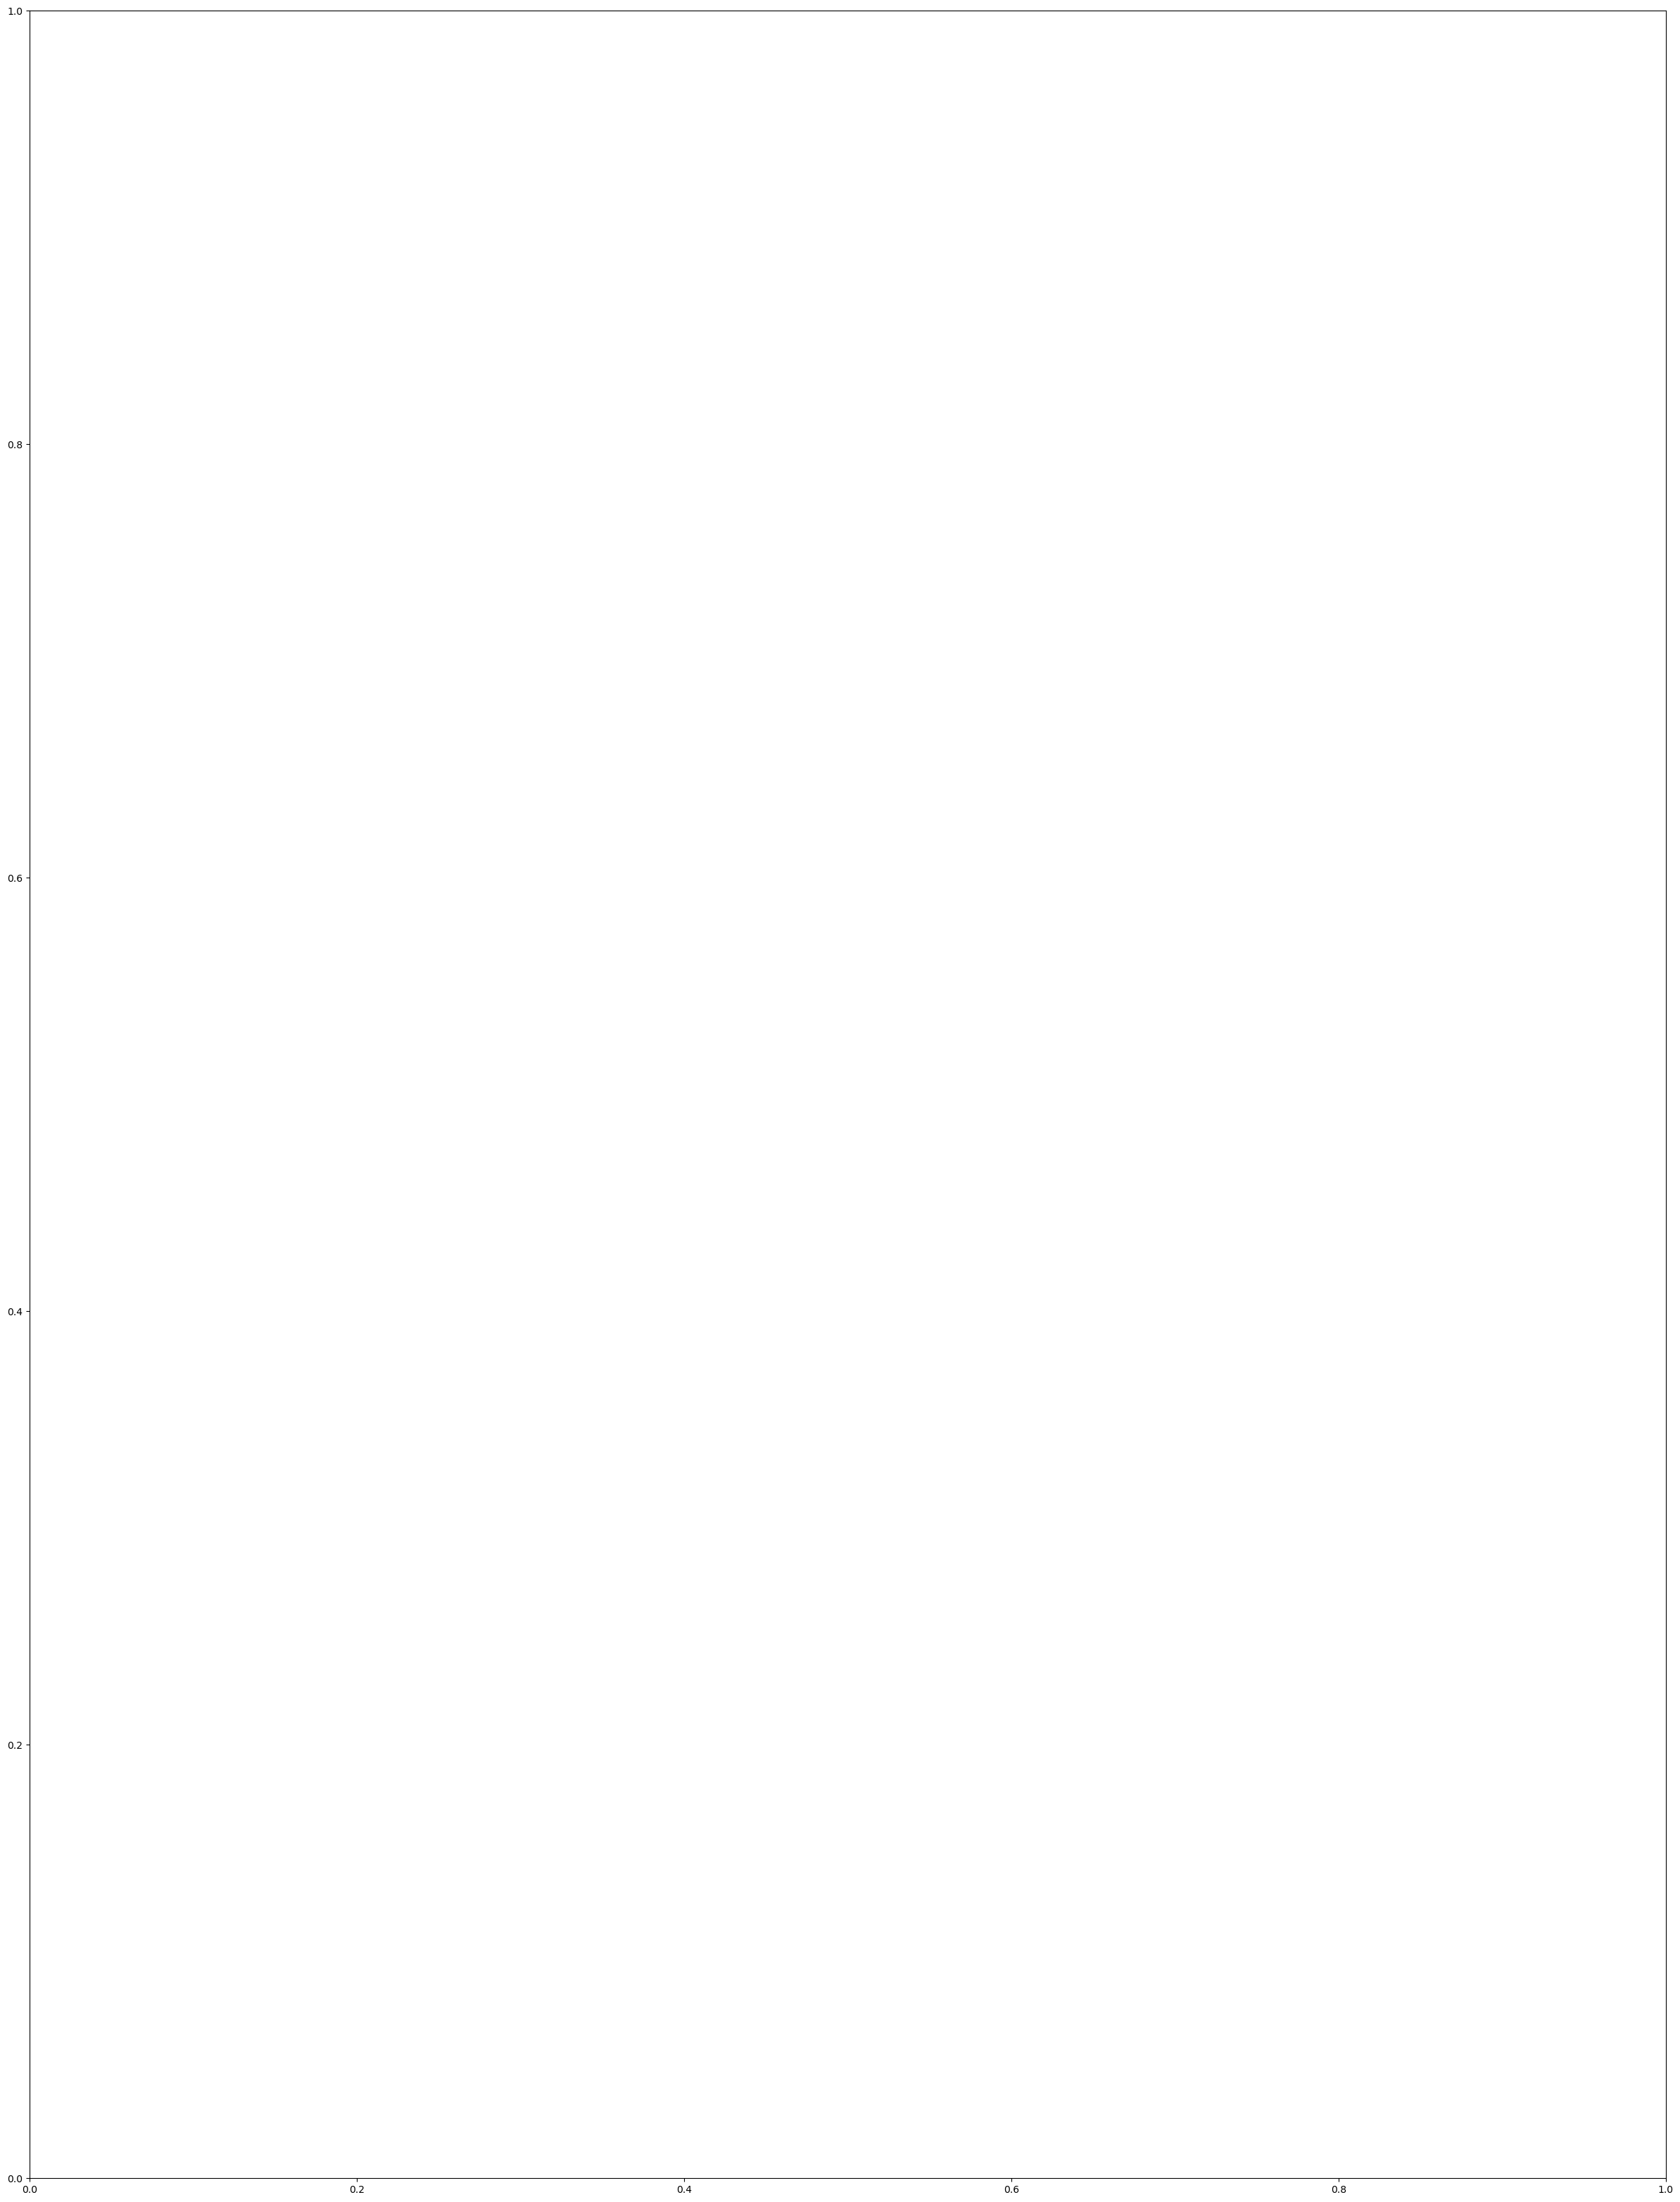

In [18]:
info = ['split_gain', 'internal_value', 'internal_count', 'internal_weight', 'leaf_count', 'leaf_weight', 'data_percentage']
lgb.plot_tree(grid_search.best_estimator_, tree_index=0, figsize=(30,40), show_info=info,example_case = X_train.loc[[1]])

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

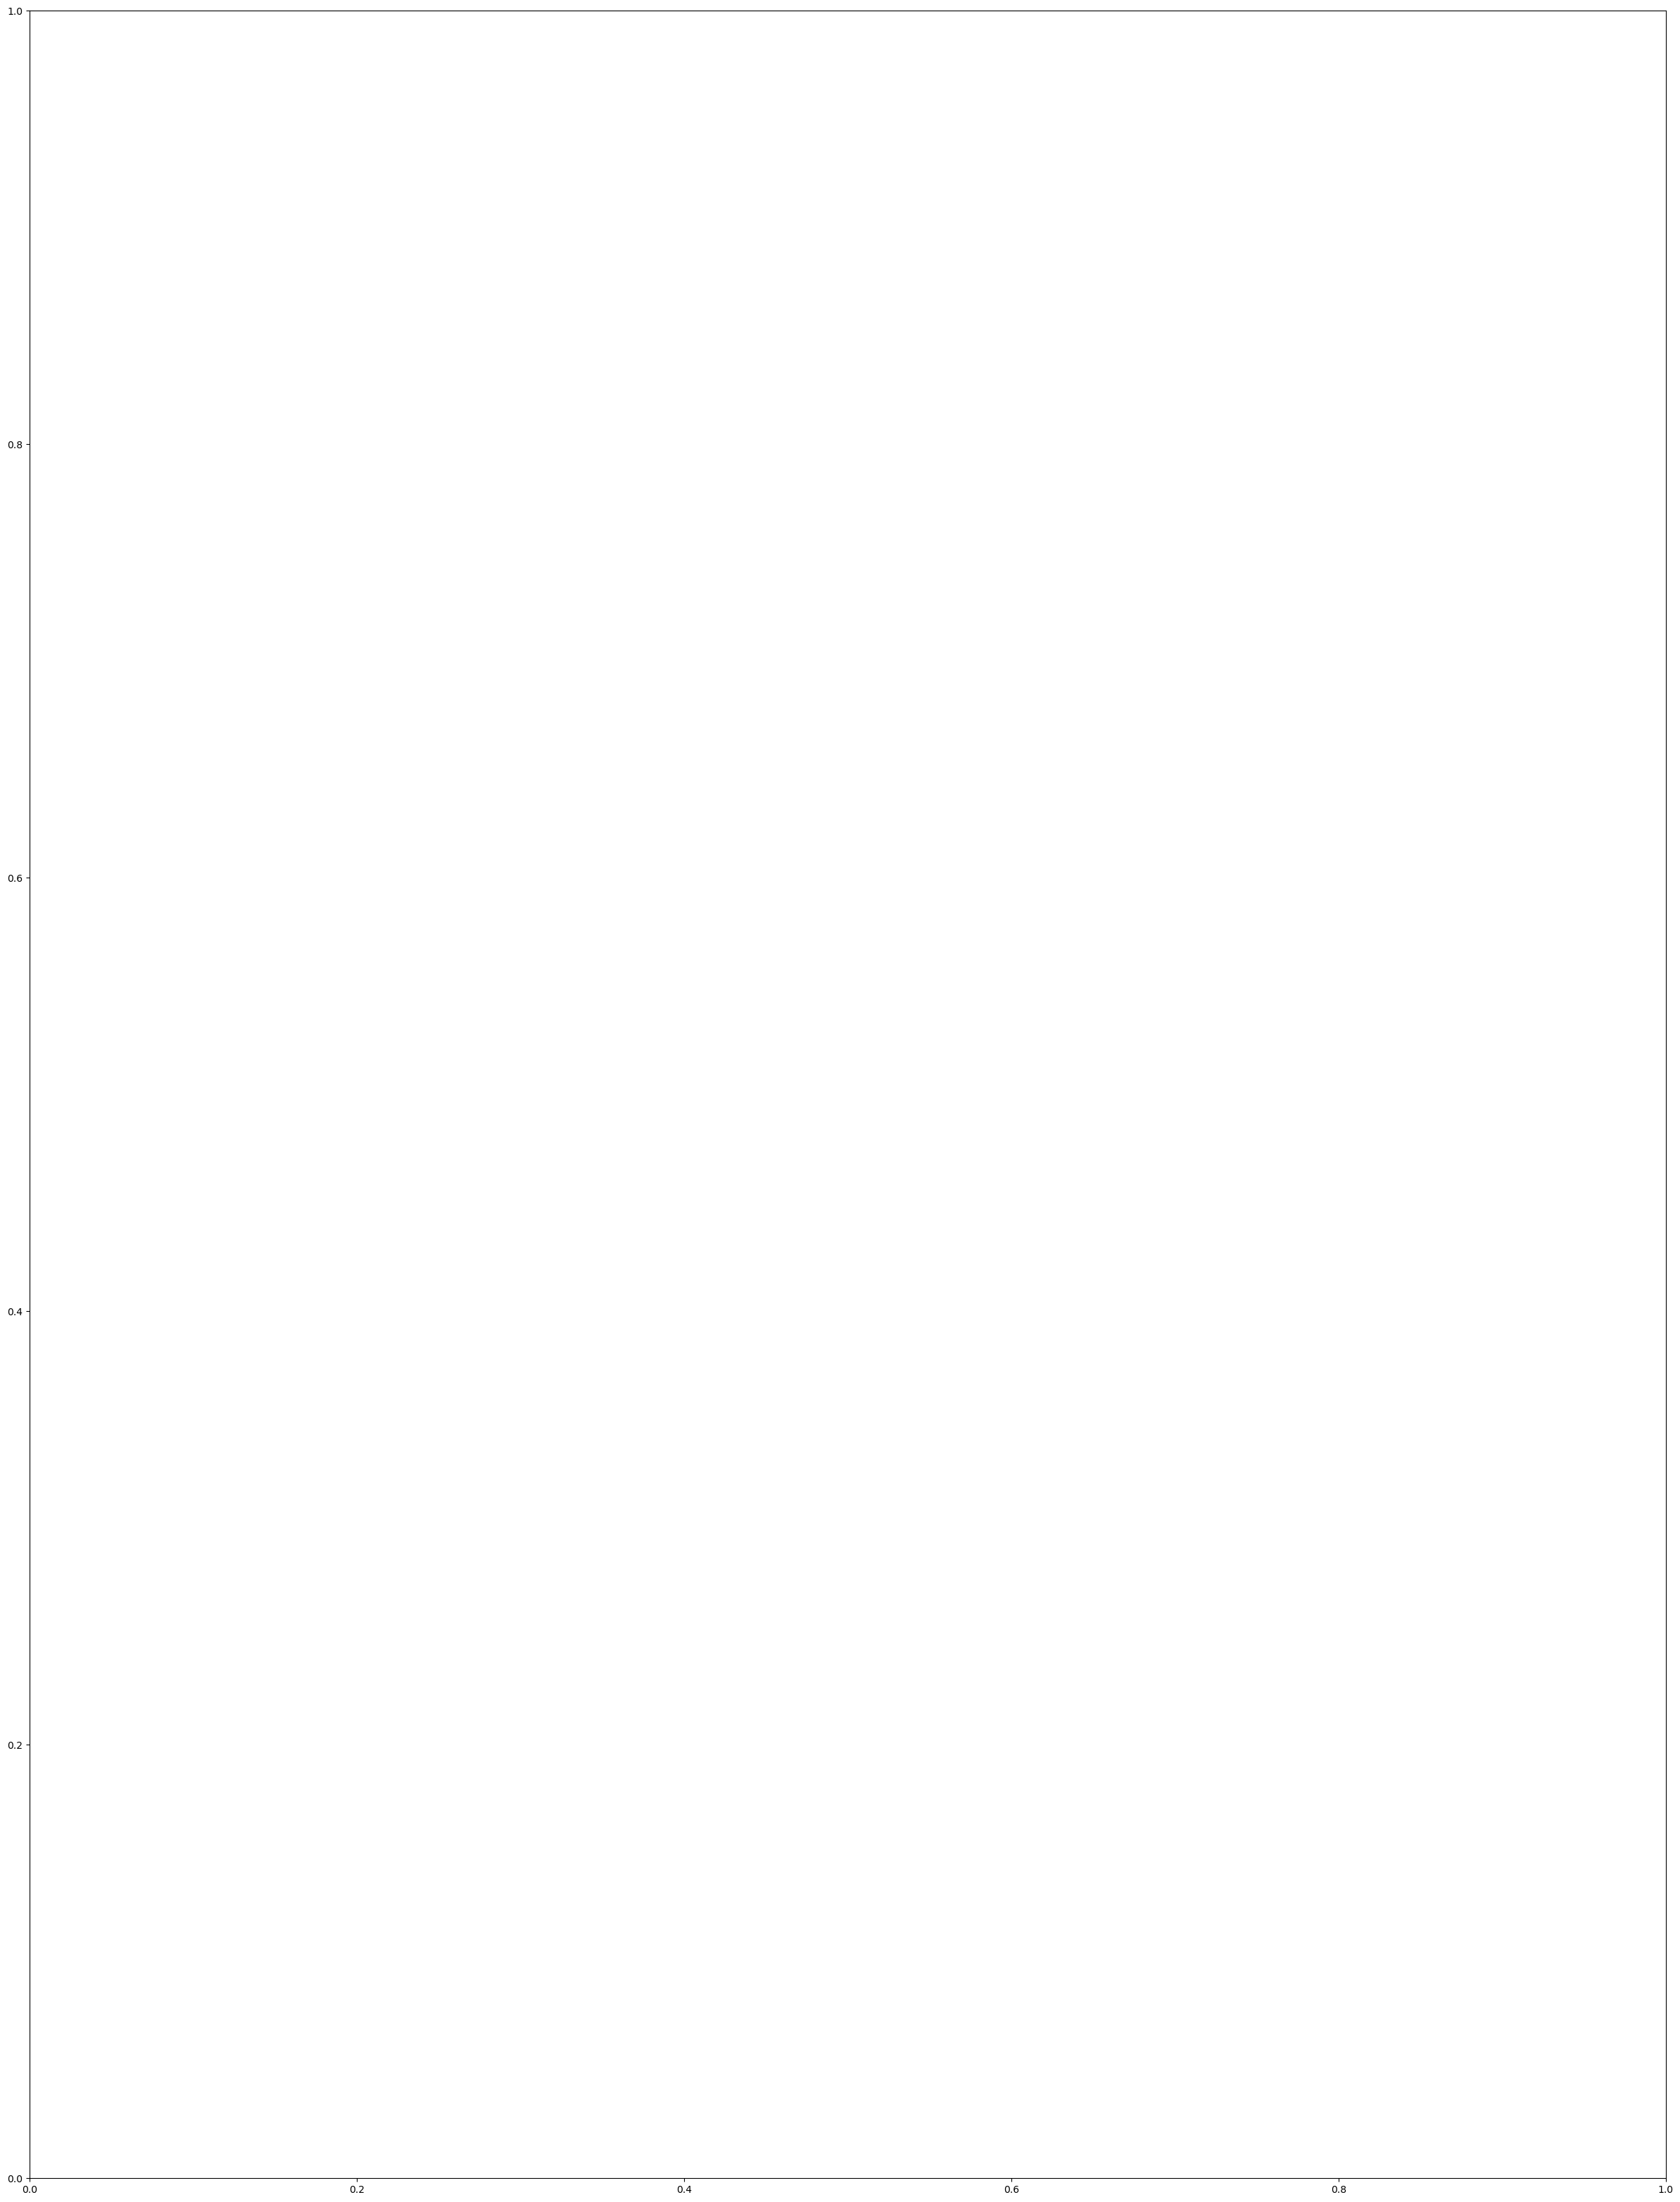

In [19]:

lgb.plot_tree(grid_search.best_estimator_, tree_index=1, figsize=(30,40), show_info=info,example_case = X_train.loc[[1]])


In [ ]:
lgb.plot_tree(grid_search.best_estimator_, tree_index=2, figsize=(30,40), show_info=info,example_case = X_train.loc[[1]])

In [20]:
tree_df = grid_search.best_estimator_.booster_.trees_to_dataframe()
print(tree_df.tree_index.max())
grid_search.best_estimator_.booster_.trees_to_dataframe()

3


,tree_index,node_depth,node_index,left_child,right_child,parent_index,split_feature,split_gain,threshold,decision_type,missing_direction,missing_type,value,weight,count
0,0,1,0-S0,0-S1,0-S14,None,flow_packets_per_second,701.815002,1.000000e-35,<=,left,None,-1.386290,0.000000,5862
1,0,2,0-S1,0-S2,0-S8,0-S0,min_fiat,511.766998,1.790047e-03,<=,left,None,-1.338270,989.178000,2971
2,0,3,0-S2,0-S6,0-S3,0-S1,min_fiat,275.135010,2.915859e-04,<=,left,None,-1.360210,904.975000,2714
3,0,4,0-S6,0-S10,0-S7,0-S2,min_fiat,36.895901,2.551079e-05,<=,left,None,-1.414520,459.391000,1371
4,0,5,0-S10,0-L0,0-L11,0-S6,min_fiat,5.512870,1.442432e-05,<=,left,None,-1.359830,97.261000,291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,3,2,3-S1,3-L1,3-S2,3-S0,min_biat,0.995648,8.955002e-04,<=,left,None,-1.486190,1099.410000,3296
128,3,3,3-L1,None,None,3-S1,None,NaN,NaN,None,None,None,-1.486294,1098.103547,3291
129,3,3,3-S2,3-L2,3-L3,3-S1,min_biat,3.568590,1.287246e-02,<=,left,None,-1.398960,1.306830,5
130,3,4,3-L2,None,None,3-S2,None,NaN,NaN,None,None,None,-1.486294,1.021492,3


In [21]:
X_train.columns.to_list()

['packets_count',
 'min_fiat',
 'min_biat',
 'flow_packets_per_second',
 'f_min_pkt_size',
 'b_min_pkt_size',
 'tcp_syn_count',
 'tcp_rst_count',
 'tcp_fin_count',
 'tcp_urg_count',
 'tcp_retr_count',
 'pktlen_1']

In [22]:
import joblib

joblib.dump(grid_search.best_estimator_, f'{current_path}/model_lightgbm.pkl')

PermissionError: [Errno 13] Permission denied: '/model_lightgbm.pkl'

In [23]:
from sklearn.feature_selection import RFE
model_for_rfe = grid_search.best_estimator_

rfe = RFE(model_for_rfe, n_features_to_select=4, step=1)
X_train_rfe = X_train
y_train_rfe = y_train
fit = rfe.fit(X_train_rfe,y_train_rfe)


[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000199 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 918
[LightGBM] [Info] Number of data points in the train set: 5862, number of used features: 11
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

In [24]:
print(("Число признаков: %d") %fit.n_features_)
print(("Отобранные признаки: %s") %fit.support_)
print(("Ранг признаков: %s") %fit.ranking_)

Число признаков: 4
Отобранные признаки: [False  True  True  True False False False False False False  True False]
Ранг признаков: [9 1 1 1 8 2 7 6 5 4 1 3]


In [25]:
feature_names_rfe = fit.get_feature_names_out()
print(feature_names_rfe)

['min_fiat' 'min_biat' 'flow_packets_per_second' 'tcp_retr_count']


In [26]:
print(fit.score(X_test,y_test))

[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
0.8280939116593713


In [27]:
dfFinal_new = dfFinal[feature_names_rfe]
y = dfFinal['type']

X  = dfFinal_new

#### Разобьем данные на подопытные и проверочные

In [28]:
X_train, X_test, y_train, y_test = X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.3,
                                                        random_state=42,
                                                        stratify=None)

In [29]:
X.shape

(8375, 4)

## LightGBM

In [30]:
estimator = lgb.LGBMClassifier(objective='multiclass', 
                               boosting_type = 'gbdt', 
                               num_class = '3',
                               n_estimators = 100, 
                               class_weight = 'balanced')

##### ...со следующим набором гиперпараметров

In [31]:
parameters = {
    'max_depth': [4],
    'num_leaves': [20],
    'min_child_samples': [19],
    'min_child_weight': [0.002],
    'feature_fraction': [0.6],
}

In [32]:
grid_search = GridSearchCV(estimator, param_grid=parameters, scoring='accuracy', cv=3)

In [33]:
grid_search.fit(X_train, y_train)

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000121 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 3908, number of used features: 4
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

GridSearchCV(cv=3,
             estimator=LGBMClassifier(class_weight='balanced', num_class='3',
                                      objective='multiclass'),
             param_grid={'feature_fraction': [0.6], 'max_depth': [4],
                         'min_child_samples': [19], 'min_child_weight': [0.002],
                         'num_leaves': [20]},
             scoring='accuracy')

In [34]:
grid_search.best_estimator_

LGBMClassifier(class_weight='balanced', feature_fraction=0.6, max_depth=4,
               min_child_samples=19, min_child_weight=0.002, num_class='3',
               num_leaves=20, objective='multiclass')

In [35]:
predictions_LGB = grid_search.predict(X_test)
print(grid_search.score(X_test, y_test))

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
0.838042180660565


Feature importances:


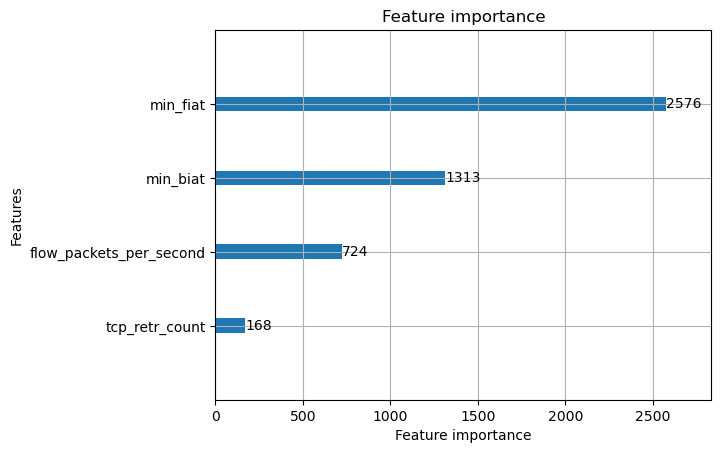


################################################################################
Confusion Matrix:


ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of ticklabels (3).

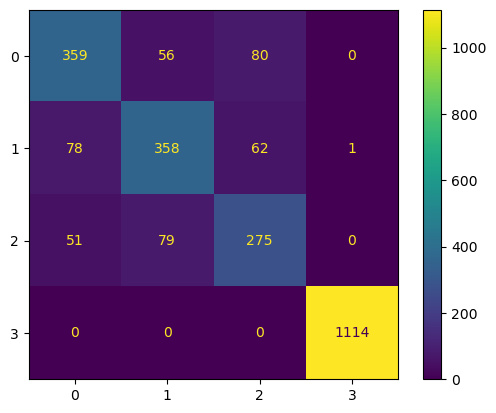

In [36]:
feature_importances = np.zeros(X.shape[1])

print('Feature importances:')
lgb.plot_importance(grid_search.best_estimator_)
plt.show()

print('\n' + '#' * 80)
print('Confusion Matrix:')
    # functions.plot_confusion_matrix(valid_y, predictions_LGB.round(), "Analysis",
    #                                 index=["Std SSH", "Obf SSH"], columns=["Std SSH", "Obf SSH"])
    # metrics.confusion_matrix(model, valid_features, valid_y, cmap='Blues_r')
cm = confusion_matrix(y_test, predictions_LGB, labels=grid_search.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["video", "music", "disk"])
disp.plot() #cmap='Blues_r')
plt.show()
    
print('\n' + '#' * 80)
print('Classification Report:')
print(metrics.classification_report(y_test, grid_search.predict(X_test)))
plt.show()

In [ ]:
lgb.plot_tree(grid_search.best_estimator_, figsize=(30,40), show_info=['data_percentage',])

## Final test on X

In [37]:
predicted_X = grid_search.predict(X)
print('LGB accuracy:', accuracy_score(y, predicted_X))

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
LGB accuracy: 0.8416716417910448


## Save model

In [ ]:
import joblib

joblib.dump(grid_search.best_estimator_, f'{current_path}/model_lightgbm_2.pkl')